In [2]:
import os
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

def load_documents(directory):
    documents = []
    filenames = []
    for filename in os.listdir(directory):
        if filename.endswith('.pdf') or filename.endswith('.txt'):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', errors='ignore') as file:
                documents.append(file.read())
                filenames.append(filename)
    return documents, filenames

def prepare_tagged_documents(documents):
    return [TaggedDocument(words=doc.split(), tags=[i]) for i, doc in enumerate(documents)]

def train_doc2vec_model(tagged_data):
    model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4)
    model.build_vocab(tagged_data)
    model.train(tagged_data, total_examples=model.corpus_count, epochs=20)
    return model

def documents_to_vectors(model, documents):
    return np.array([model.infer_vector(doc.split()) for doc in documents])

def calculate_similarity(vectors):
    return cosine_similarity(vectors)

directory_path = '/kaggle/input/demo-db'
documents, filenames = load_documents(directory_path)
tagged_data = prepare_tagged_documents(documents)
model = train_doc2vec_model(tagged_data)
doc_vectors = documents_to_vectors(model, documents)
similarity_matrix = calculate_similarity(doc_vectors)

print("Similarity Matrix using Doc2vec approach:")
for i, filename in enumerate(filenames):
    print(f"\n{filename}:")
    for j, sim in enumerate(similarity_matrix[i]):
        print(f"  Similarity with {filenames[j]}: {sim:.4f}")


Similarity Matrix using Doc2vec approach:

design and implementation.pdf:
  Similarity with design and implementation.pdf: 1.0000
  Similarity with a survey of ai t2i and t2v.pdf: 0.6525
  Similarity with implementation-of-text-to-speech-conversion-IJERTV3IS030548.pdf: 0.6240
  Similarity with t2v_visual_impaired.pdf: 0.6582
  Similarity with t2speech.pdf: 0.4347
  Similarity with t2s_synthesis.pdf: 0.5855

a survey of ai t2i and t2v.pdf:
  Similarity with design and implementation.pdf: 0.6525
  Similarity with a survey of ai t2i and t2v.pdf: 1.0000
  Similarity with implementation-of-text-to-speech-conversion-IJERTV3IS030548.pdf: 0.3775
  Similarity with t2v_visual_impaired.pdf: 0.5558
  Similarity with t2speech.pdf: 0.5380
  Similarity with t2s_synthesis.pdf: 0.5363

implementation-of-text-to-speech-conversion-IJERTV3IS030548.pdf:
  Similarity with design and implementation.pdf: 0.6240
  Similarity with a survey of ai t2i and t2v.pdf: 0.3775
  Similarity with implementation-of-text-t

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

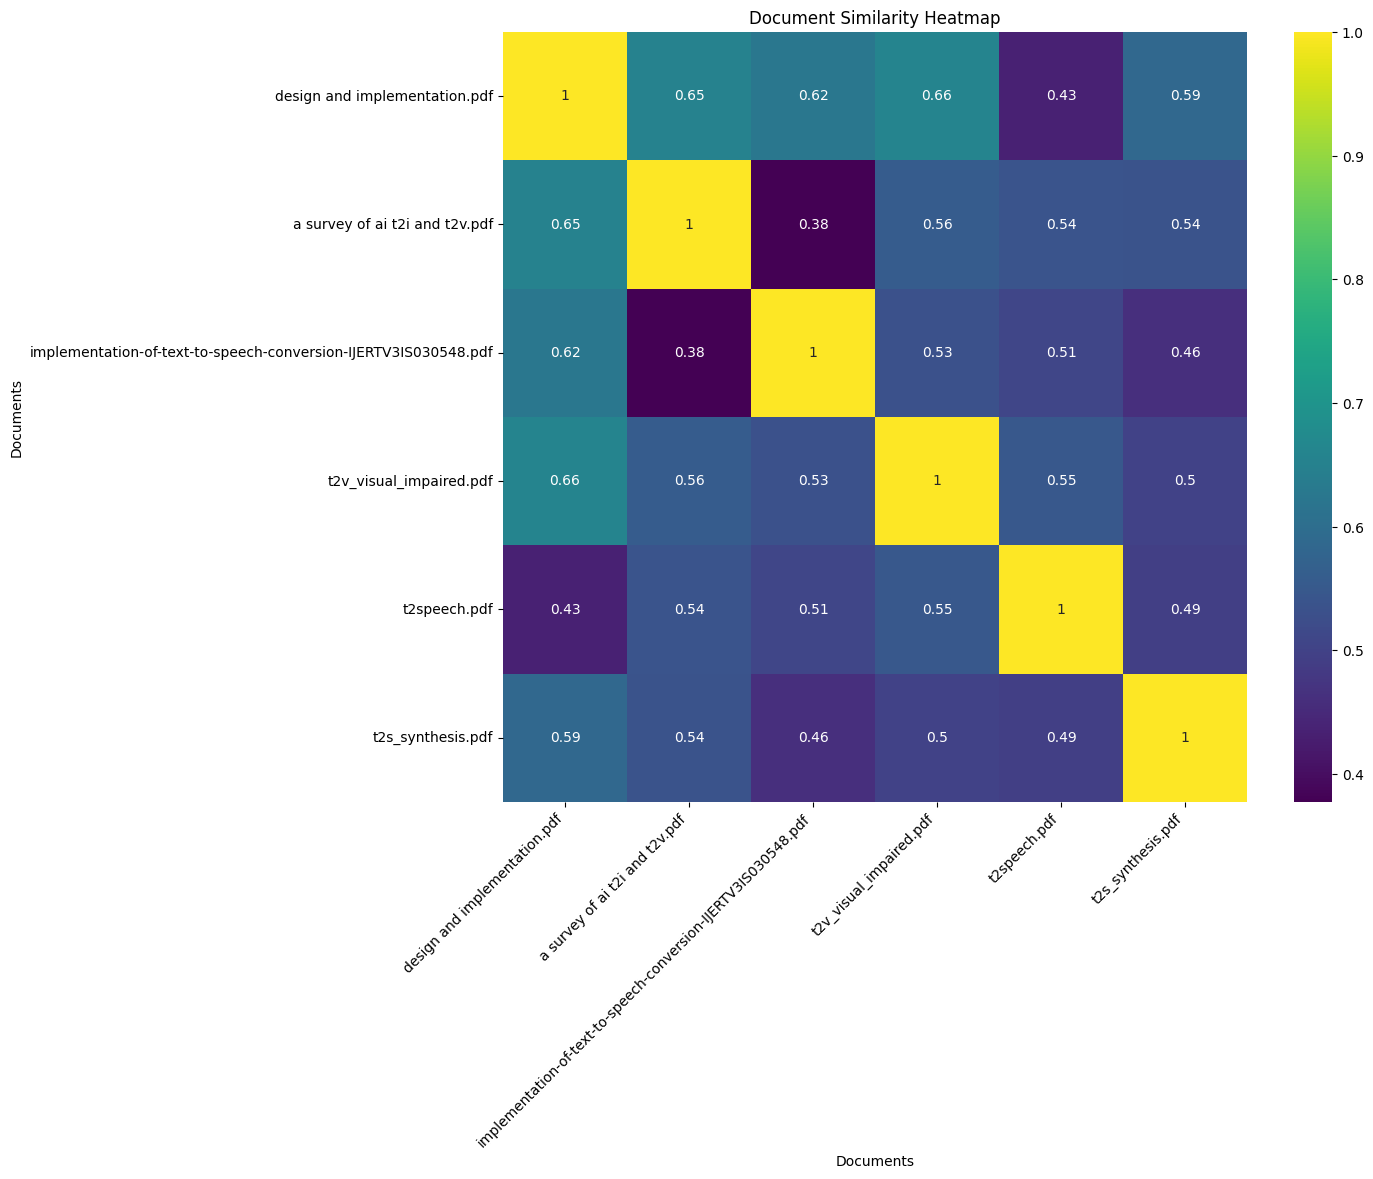

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(similarity_matrix, annot=True, cmap='viridis', xticklabels=filenames, yticklabels=filenames, ax=ax)

ax.set_xlabel('Documents')
ax.set_ylabel('Documents')
ax.set_title('Document Similarity Heatmap')

plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0) 
plt.show()
